In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

**1 - Load the data from our csv file**

In [2]:
data = pd.read_csv("data.csv", sep=",")
data

,date,value
0,1-Apr-2021,NaN
1,2-Apr-2021,NaN
2,3-Apr-2021,NaN
3,4-Apr-2021,1.0
4,5-Apr-2021,NaN
...,...,...
148,27-Aug-2021,NaN
149,28-Aug-2021,NaN
150,29-Aug-2021,NaN
151,30-Aug-2021,1.0


**2 - Convert the date string to a data**  
**3 - Create a new column with the day and one with the month**


In [3]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month

data

,date,value,day,month
0,2021-04-01,NaN,1,4
1,2021-04-02,NaN,2,4
2,2021-04-03,NaN,3,4
3,2021-04-04,1.0,4,4
4,2021-04-05,NaN,5,4
...,...,...,...,...
148,2021-08-27,NaN,27,8
149,2021-08-28,NaN,28,8
150,2021-08-29,NaN,29,8
151,2021-08-30,1.0,30,8


**4 - Create a pivot table with month, day and the value**


In [4]:
pivot = data.pivot(index='month', columns='day', values='value')
pivot.fillna(0, inplace=True)

pivot

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**5 - Put the pivot table in reverse into the `seaborn.heatmap`**


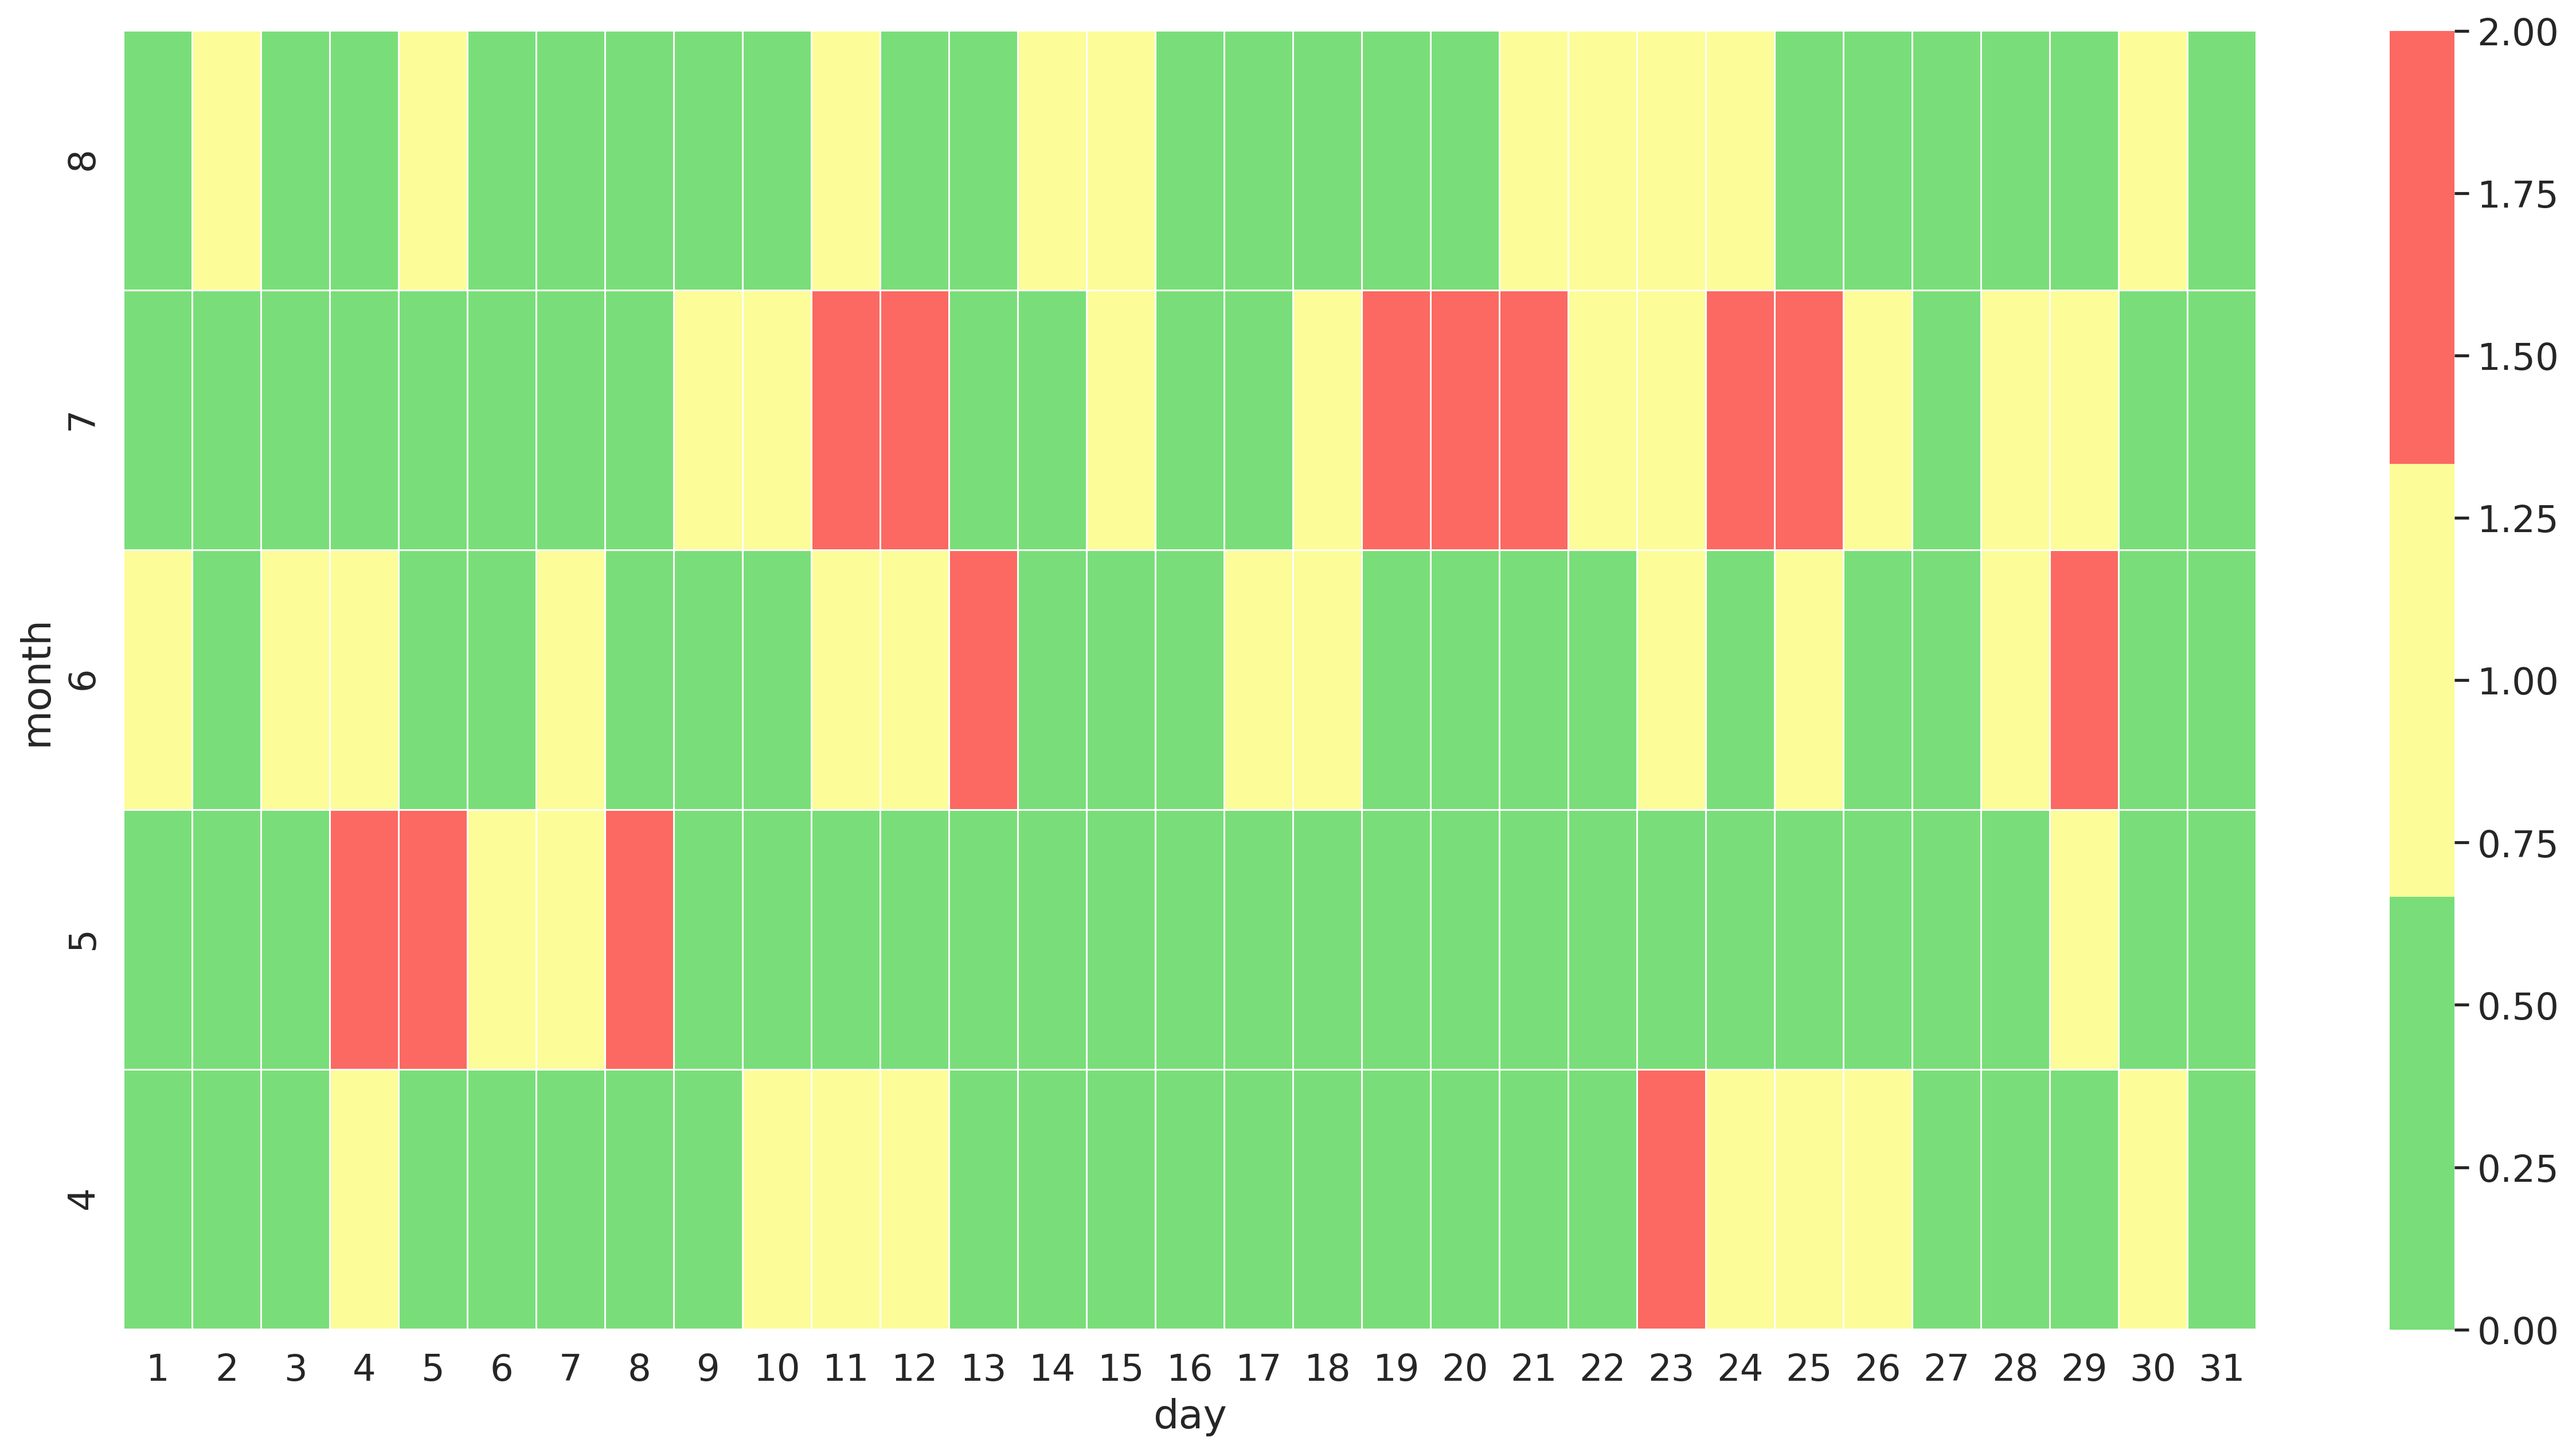

In [5]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(20,10), dpi=300)
ax = sns.heatmap(pivot[::-1], cmap=ListedColormap(['#79de79', '#fcfc99', '#fb6962']), linewidths=.5)